## 06.[21032024] Black hole binary formation channels with Gaussian mixtures
1. Load the file and visualise the data
2. Complete 10 fits of the data using `fit[i] = GaussianMixture(i+1).fit(data)` with N=1,...,10 Gaussians
3. For each fit compute the AIC as `fit[i].aic(data)`
4. Plot the preferred solution over the data

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

(array([  1.,   0.,   1.,   1.,   1.,   0.,   2.,   3.,   2.,   1.,   4.,
          1.,   3.,   7.,   6.,  11.,   4.,  11.,   9.,  15.,  13.,   9.,
         11.,  19.,  19.,  11.,  16.,  17.,  19.,  12.,  14.,  14.,   9.,
         15.,  13.,   4.,  12.,  10.,   3.,   5.,   8.,  14.,  23.,  40.,
         72., 117., 145., 129., 104.,  51.,  38.,  26.,  48.,  44.,  47.,
         47.,  51.,  73.,  59.,  80.,  69.,  75.,  78.,  85.,  82.,  88.,
         86.,  84.,  80.,  71.,  87.,  58.,  57.,  65.,  49.,  48.,  32.,
         33.,  32.,  26.,  34.,  17.,  15.,  14.,  11.,  12.,   2.,   6.,
          0.,   1.,   2.,   2.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,
          1.]),
 array([-4.965425  , -4.42875831, -3.89209161, -3.35542492, -2.81875822,
        -2.28209152, -1.74542483, -1.20875813, -0.67209144, -0.13542474,
         0.40124195,  0.93790865,  1.47457534,  2.01124204,  2.54790873,
         3.08457543,  3.62124212,  4.15790882,  4.69457551,  5.23124221,
         5.7679089 ,  6.30

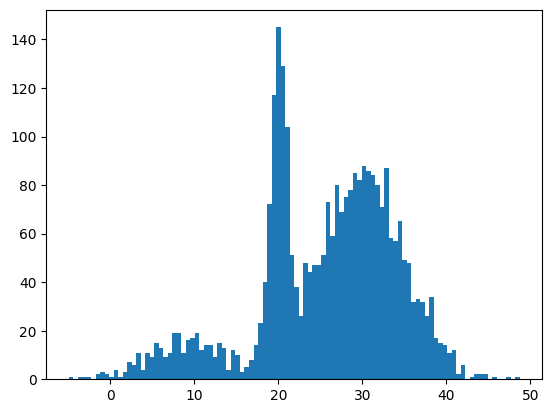

In [2]:
bh_mass = np.load("C:/Users/giuli/OneDrive/Desktop/uni/magistrale/astro_stat/reps/astrostatistics_bicocca_2024/working/formationchannels.npy")
#print(bh_mass)
plt.hist(bh_mass, bins=100)

The AIC is minimised for N = 3 Gaussians


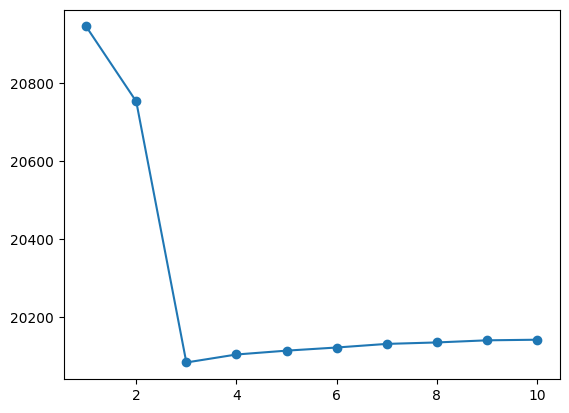

In [3]:
fit_model = [] 
AIC = []
N = np.arange(1, 11)

# create 10 fits with 1 to 10 Gaussians and compute their AIC
for i in range(1, 11): 
    fit_model.append(GaussianMixture(i).fit(bh_mass))
    AIC.append(fit_model[i-1].aic(bh_mass))

plt.plot(N, AIC)
plt.scatter(N, AIC)

print("The AIC is minimised for N =", N[np.argmin(AIC)], "Gaussians")

(array([0.00063165, 0.        , 0.00063165, 0.00063165, 0.00063165,
        0.        , 0.00126329, 0.00189494, 0.00126329, 0.00063165,
        0.00252658, 0.00063165, 0.00189494, 0.00442152, 0.00378987,
        0.0069481 , 0.00252658, 0.0069481 , 0.00568481, 0.00947468,
        0.00821139, 0.00568481, 0.0069481 , 0.01200126, 0.01200126,
        0.0069481 , 0.01010633, 0.01073797, 0.01200126, 0.00757974,
        0.00884304, 0.00884304, 0.00568481, 0.00947468, 0.00821139,
        0.00252658, 0.00757974, 0.00631645, 0.00189494, 0.00315823,
        0.00505316, 0.00884304, 0.01452784, 0.02526582, 0.04547847,
        0.07390251, 0.09158858, 0.08148226, 0.06569112, 0.03221392,
        0.02400253, 0.01642278, 0.03031898, 0.0277924 , 0.02968733,
        0.02968733, 0.03221392, 0.04611011, 0.03726708, 0.05053163,
        0.04358353, 0.04737341, 0.04926834, 0.05368986, 0.05179492,
        0.0555848 , 0.0543215 , 0.05305821, 0.05053163, 0.04484682,
        0.05495315, 0.03663543, 0.03600379, 0.04

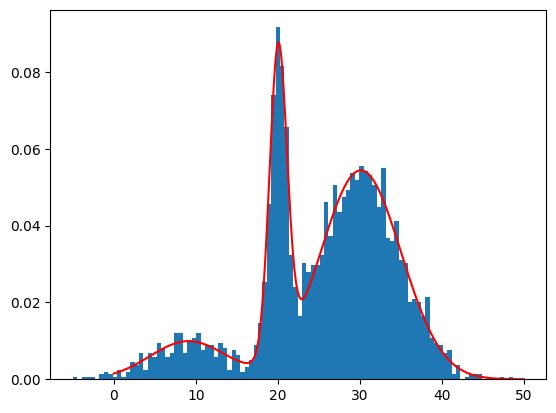

In [15]:
x = np.linspace(0, 50, 1000)
logprob = fit_model[np.argmin(AIC)].score_samples(x.reshape(-1,1))
pdf = np.exp(logprob)

plt.plot(x, pdf, color='red')
plt.hist(bh_mass, bins=100, density=True)

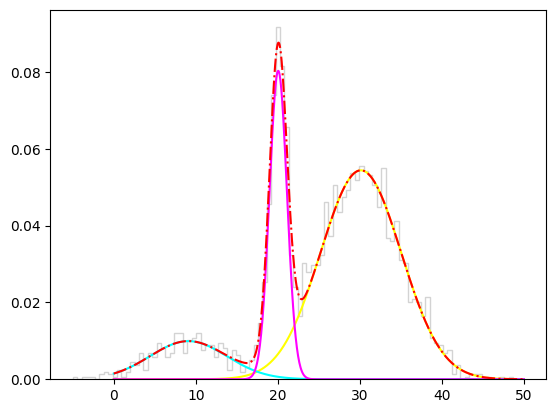

In [23]:
components = fit_model[np.argmin(AIC)].predict_proba(x.reshape(-1,1))
single_pdf = components*pdf[:, np.newaxis]

plt.hist(bh_mass, bins=100, density=True, histtype='step', color='lightgrey')

plt.plot(x, single_pdf[:,0], color='yellow')
plt.plot(x, single_pdf[:,1], color='cyan')
plt.plot(x, single_pdf[:,2], color='magenta')

plt.plot(x, pdf, color='red', linestyle='dashdot')